In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
#Dataset Import

data = pd.read_csv("Netflix_movies_and_tv_shows_clustering.csv")

In [ ]:
data.head()

Data Cleaning

In [ ]:
data.info()

In [ ]:
data.isna().sum()

In [4]:
data.shape

(7787, 12)

The missing values in the director, cast, and country attributes can be replaced with 'Unknown'.

10 records with missing values in the date_added column can be dropped.

The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [37]:
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True) 
data['country'].fillna('Unknown', inplace=True) 

data['rating'].fillna(data['rating'].mode()[0], inplace=True)  
data.dropna(axis=0, subset=['date_added'], inplace=True)


In [6]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
data.duplicated().sum()

In [ ]:
#displays number of unique values in each column
data.nunique()

In [38]:
#considering the first genre and country for analysis
data['genre'] = data['listed_in'].apply(lambda x: x.split(',')[0])
data['country'] = data['country'].apply(lambda x: x.split(',')[0])

In [39]:
#drop listed_in
data.drop(columns=['listed_in'], inplace=True)

In [9]:
data.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...,International TV Shows
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"In a postapocalyptic world, rag-doll robots hi...",Action & Adventure


In [40]:
#taking only the integer val of duration
data['duration'] = data['duration'].apply(lambda x: int(x.split()[0]))
                                          

In [11]:
data['duration'].dtype

dtype('int64')

In [ ]:
data['duration']

In [12]:
# Movie length in minutes
print(data[data['type']=='Movie'].duration.unique())
# TV Show length in seasons
print(data[data['type']=='TV Show'].duration.unique())

[ 93  78  80 123  95 119 118 143 103  89  91 149 144 124  87 110 128 117
 100  84  99  90 102 104 105  56 125  81  97 106 107 109  44  75 101  37
 113 114 130  94 140 135  82  70 121  92 164  53  83 116  86 120  96 126
 129  77 137 148  28 122 176  85  22  68 111  29 142 168  21  59  20  98
 108  76  26 156  30  57 150 133 115 154 127 146 136  88 131  24 112  74
  63  38  25 174  60 153 158 151 162  54  51  69  64 147  42  79  40  45
 172  10 163  55  72  61  71 160 171  48 139 157  15  65 134 161  62 186
  49  73  58 165 166 138 159 141 132  52  67  34  66 312 180  47 155  14
 177  11   9  46 145   8  12  43  50  23 185 200 169  27 170 196  33 181
 204  32  35 167 179 193  13 214  17 173 192 209 187  41 182 224 233 189
 152  19 208 237  31 178 230 194 228 195   3  16   5  18 205 190  36 201
 253 203 191]
[ 4  1  2  3  5  9  8  6 11  7 13 12 10 16 15]


In [41]:
data['month_added'] = data['date_added'].apply(lambda x: x.split(',')[0])
data['year_added'] = data['date_added'].apply(lambda x: x.split(',')[1].strip())


In [42]:
data['month_added'] = data['month_added'].apply(lambda x: x.split(' ')[0])

In [43]:
data['month_added']

0          August
1        December
2        December
3        November
4         January
          ...    
7782      October
7783        March
7784    September
7785      October
7786        March
Name: month_added, Length: 7777, dtype: object

In [ ]:
data['year_added'].head(286)

In [14]:
#typecasting date_added to datetime
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y',errors='coerce')

In [ ]:
data.info()

In [ ]:
data['date_added'].head(286)

<Axes: xlabel='rating', ylabel='count'>

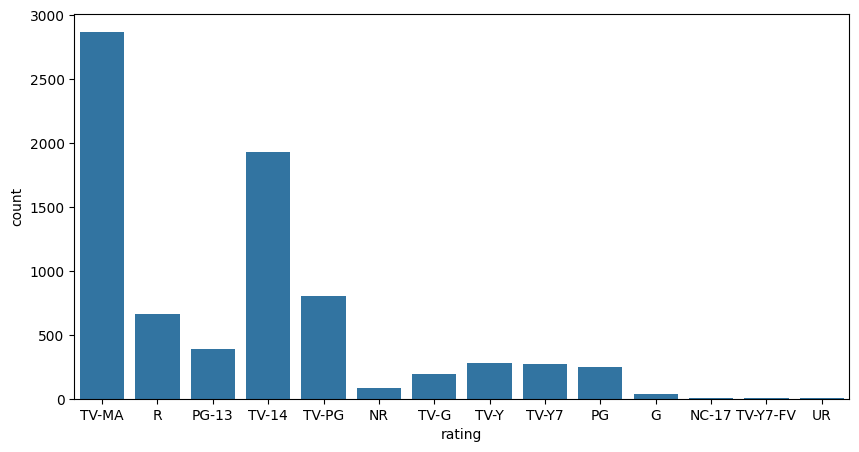

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=data)

So, max shows are rated TV-MA and TV-14 and TV-PG

In [16]:
#tagging all the ratings for different age groups

rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

data['age_group'] = data['rating'].map(rating_map)
data['age_group'].value_counts()

age_group
Adults          3624
Young Adults    1928
Older Kids      1327
Kids             512
Teens            386
Name: count, dtype: int64

EDA

Univariate Analysis -- analysis with help of one variable

Text(0.5, 1.0, 'Distribution of Age Groups')

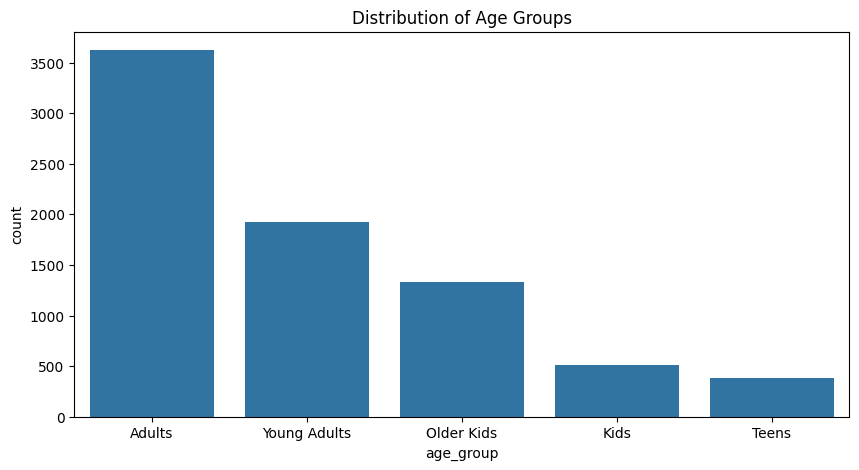

In [17]:
# Plotting the distribution of age groups
plt.figure(figsize=(10,5))
sns.countplot(x='age_group', data=data, order=data['age_group'].value_counts().index)
plt.title('Distribution of Age Groups')

Most of the netflix content is for Adults and Grown ups

Text(0.5, 1.0, 'Distribution of Content Types')

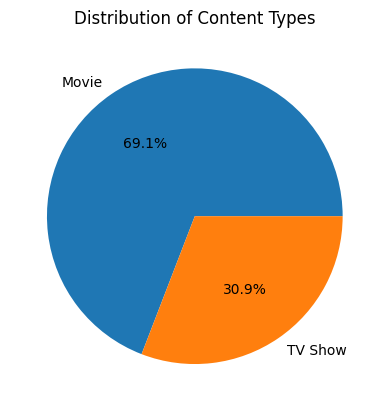

In [18]:
plt.Figure(figsize=(10,5))
data.type.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.title('Distribution of Content Types')

Text(0.5, 1.0, 'Top 10 Directors')

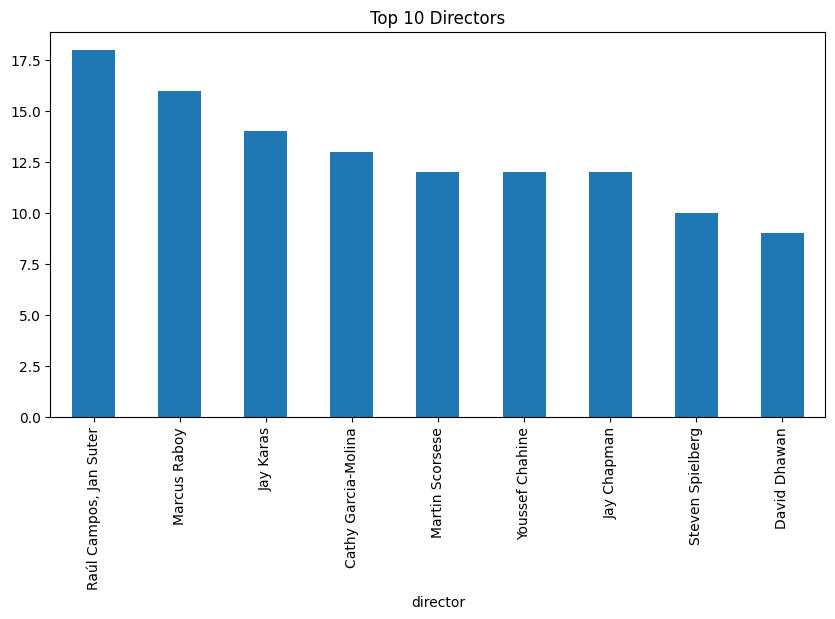

In [19]:
plt.figure(figsize=(10,5))
top_directors = data['director'].value_counts().head(10)
#remove unknown directors
top_directors = top_directors[top_directors.index != 'Unknown']
top_directors.plot(kind='bar')
plt.title('Top 10 Directors')

Text(0.5, 1.0, 'Top 10 Countries')

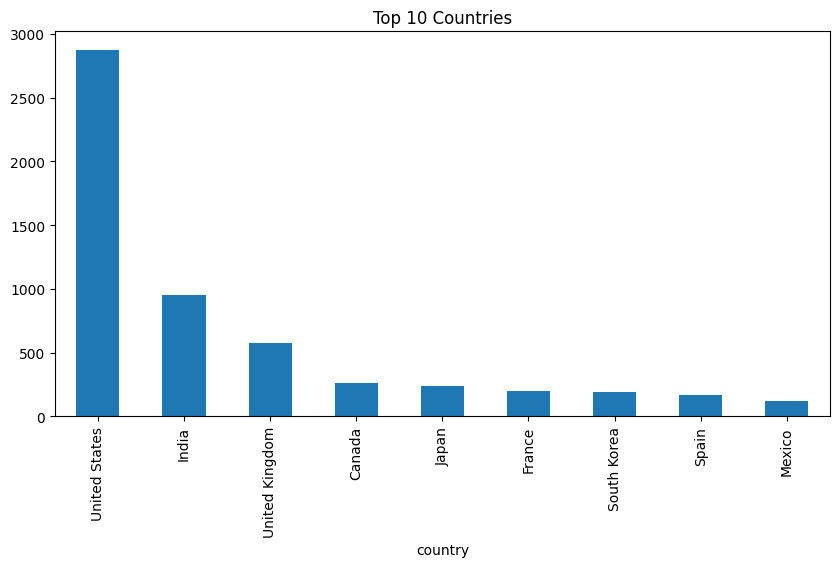

In [20]:
plt.figure(figsize=(10,5))
top_countries = data['country'].value_counts().head(10)

top_countries = top_countries[top_countries.index != 'Unknown']
top_countries.plot(kind='bar')
plt.title('Top 10 Countries')

Text(0.5, 1.0, 'Distribution of Release Years')

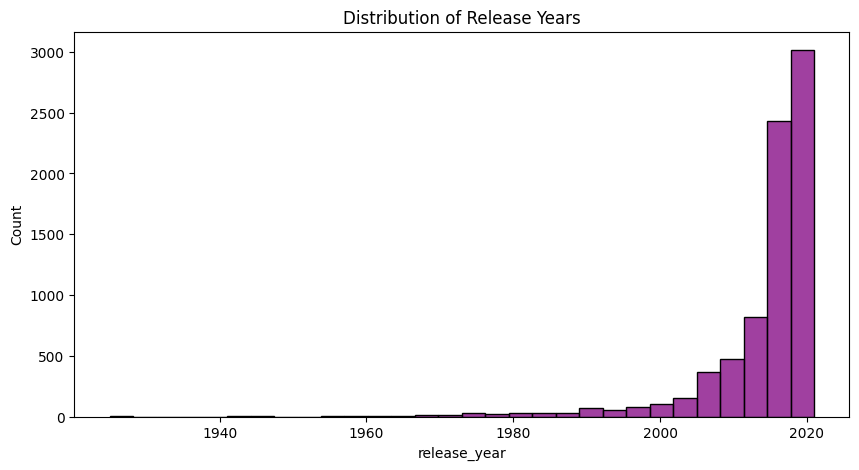

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(data['release_year'], bins=30, color='purple')
plt.title('Distribution of Release Years')

Most of the content are released in latest years

Text(0.5, 1.0, 'Top 10 Genres')

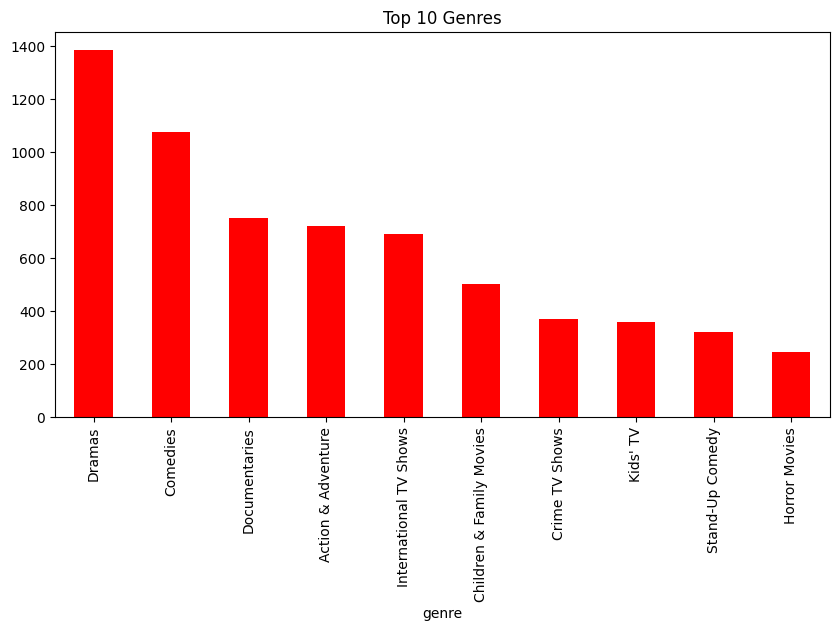

In [60]:
plt.figure(figsize=(10,5))
top_genres = data['genre'].value_counts().head(10)

top_genres = top_genres[top_genres.index != 'Unknown']
top_genres.plot(kind='bar', color='red')
plt.title('Top 10 Genres')

In [28]:
top_3genre = data['genre'].value_counts().head(3)
top_3genre = top_3genre[top_3genre.index != 'Unknown']

percent = (top_3genre.values.sum()/len(data['genre'])) * 100

In [29]:
print(f"Share of Top 3 Genres of content: {percent}")

Share of Top 3 Genres of content: 41.26269769834126


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'December'),
  Text(1, 0, 'October'),
  Text(2, 0, 'January'),
  Text(3, 0, 'November'),
  Text(4, 0, 'March'),
  Text(5, 0, 'September'),
  Text(6, 0, 'August'),
  Text(7, 0, 'April'),
  Text(8, 0, 'July'),
  Text(9, 0, 'June'),
  Text(10, 0, 'May'),
  Text(11, 0, 'February'),
  Text(12, 0, '')])

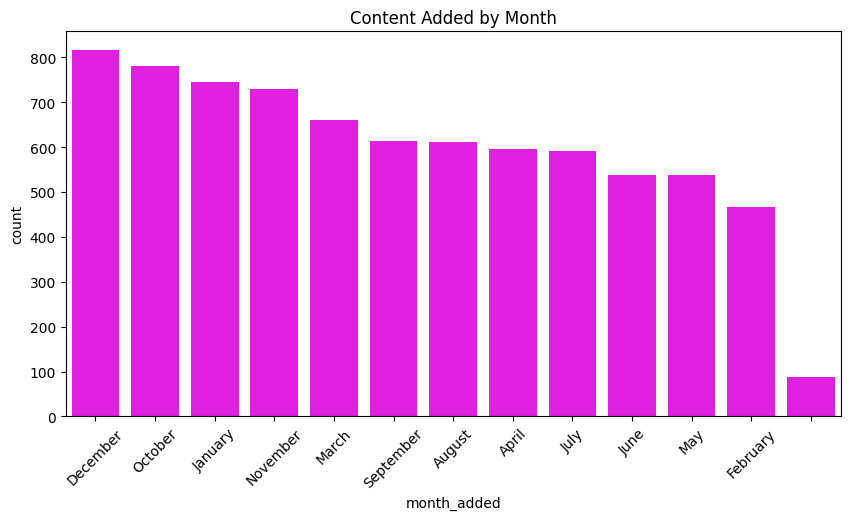

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='month_added', data=data, order= data['month_added'].value_counts().index , color='magenta')
plt.title('Content Added by Month')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021')])

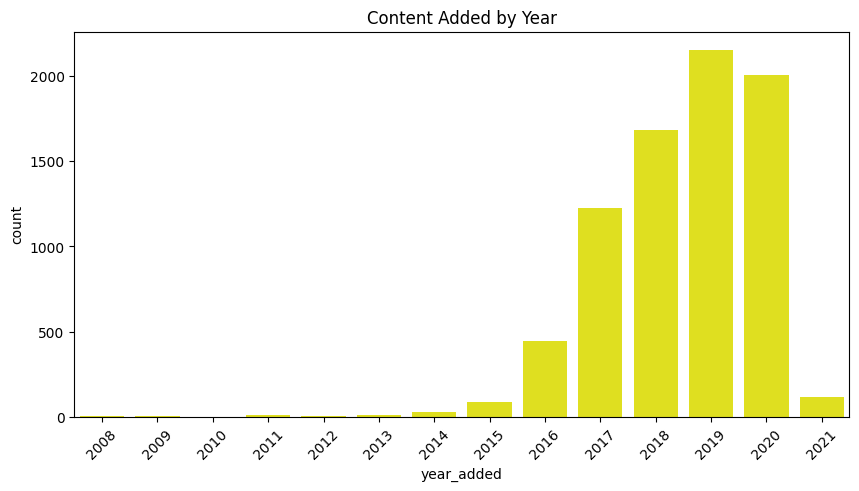

In [54]:
plt.figure(figsize=(10,5))
#plot the years in ascending order
data['year_added'] = data['year_added'].astype(int)
sns.countplot(x='year_added', data=data,  color='yellow')
plt.title('Content Added by Year')
plt.xticks(rotation=45)

Bivariate Analysis -- Analysis with 2 variables

Text(0, 0.5, 'No. of movies/ TV shows')

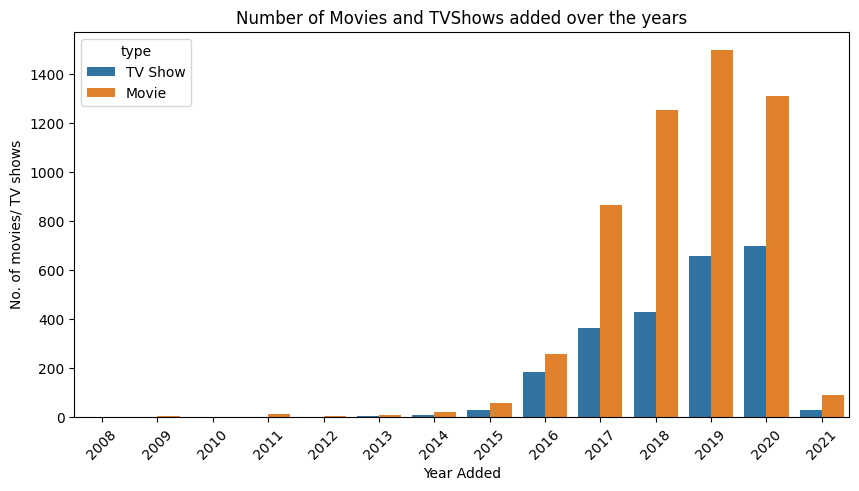

In [64]:
#content v/s year_added
plt.figure(figsize=(10,5))
sns.countplot(x='year_added', data=data,  hue='type')
plt.title('Number of Movies and TVShows added over the years')
plt.xticks(rotation=45)
plt.xlabel('Year Added')
plt.ylabel('No. of movies/ TV shows')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021'),
  Text(14, 0, '2022')])

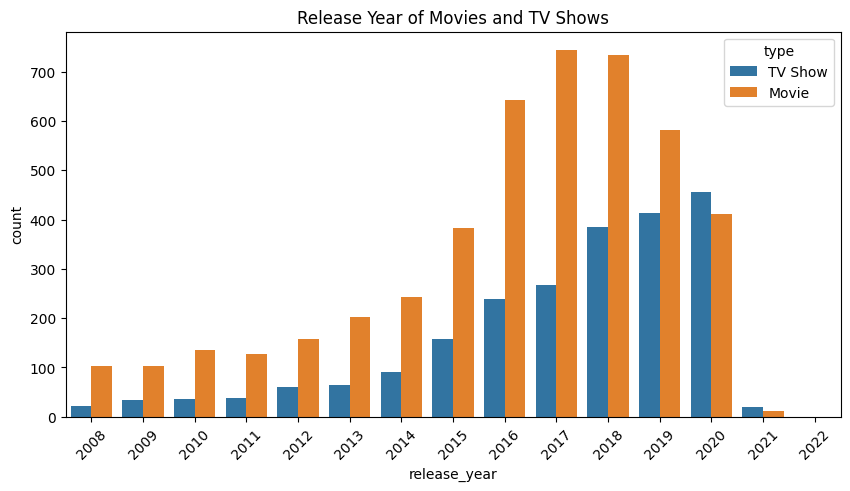

In [66]:
plt.figure(figsize=(10,5))
order = range(2008,2023)
sns.countplot(x='release_year', data=data, hue='type',order=sorted(order))
plt.title('Release Year of Movies and TV Shows')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Distribution of TV Show Durations (in seasons)')

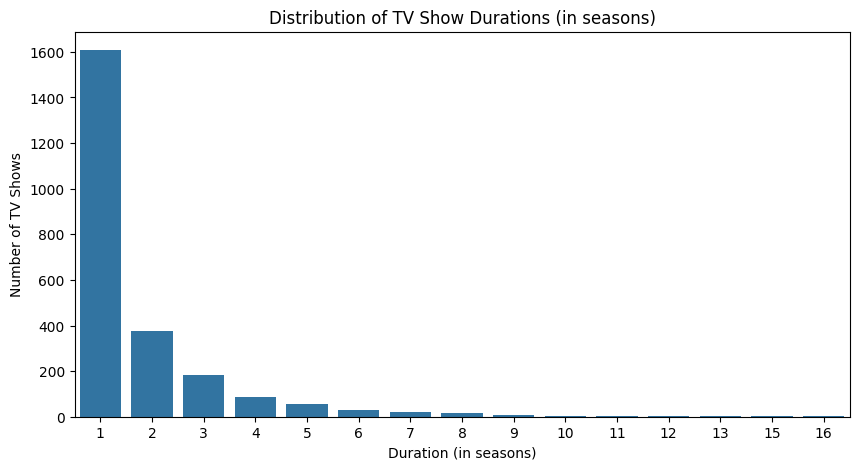

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(x='duration', data=data[data['type']=='TV Show'])
plt.xlabel('Duration (in seasons)')
plt.ylabel('Number of TV Shows')
plt.title('Distribution of TV Show Durations (in seasons)')

In [75]:
# Count the number of TV Shows with duration = 1 season
print(f"Percent of TV Shows with 1 season")
len(data[(data['type'] == 'TV Show') & (data['duration'] == 1)])/len(data) * 100


Percent of TV Shows with 1 season


20.676353349620676

Text(0.5, 1.0, 'Distribution of Movie Durations (in minutes)')

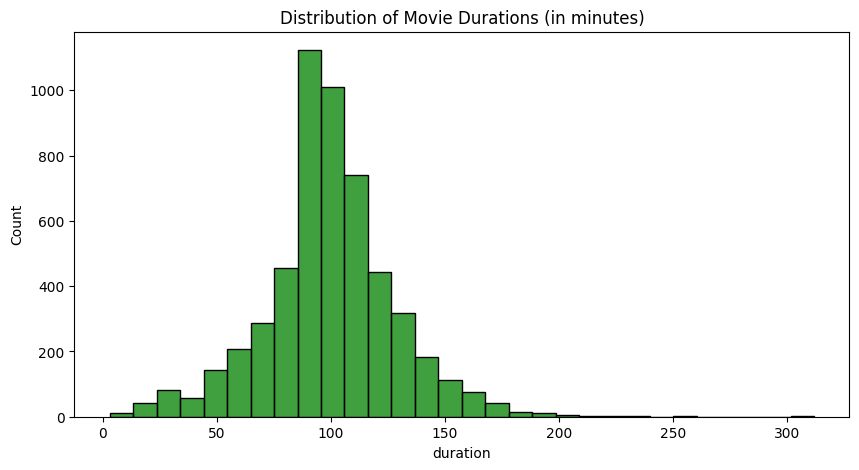

In [81]:
plt.figure(figsize=(10,5))
sns.histplot(x='duration', data=data[data['type'] == 'Movie'], bins=30, color='green')
plt.title('Distribution of Movie Durations (in minutes)')

In [82]:
data[data['type']=='Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

So. movies span from minimum 3mins to 312 mins

Text(0, 0.5, 'Average Duration of movies (in minutes)')

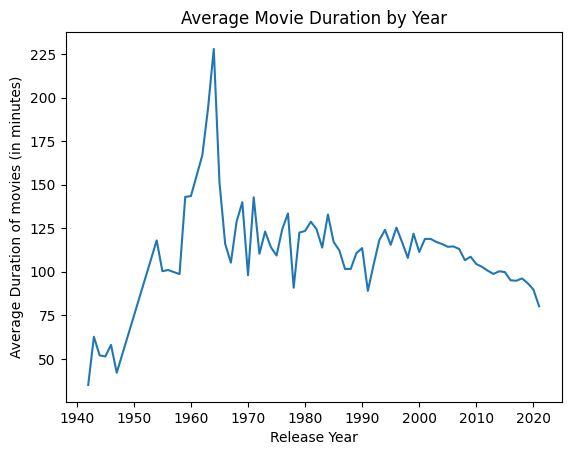

In [83]:
#Average movie duration over the years

#Average of movie duration by year
data[data['type'] == 'Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average Movie Duration by Year')
plt.xlabel('Release Year')
plt.ylabel('Average Duration of movies (in minutes)')

Movies during 1960-1970 had longest durations of above 225 min


In [84]:
data[data['type']=='Movie'].release_year.describe()

count    5377.000000
mean     2012.920030
std         9.663282
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

Oldest movie in netflix was released in 1942 and latest one in 2021 acc to this dataset

Text(0.5, 0, 'Genre')

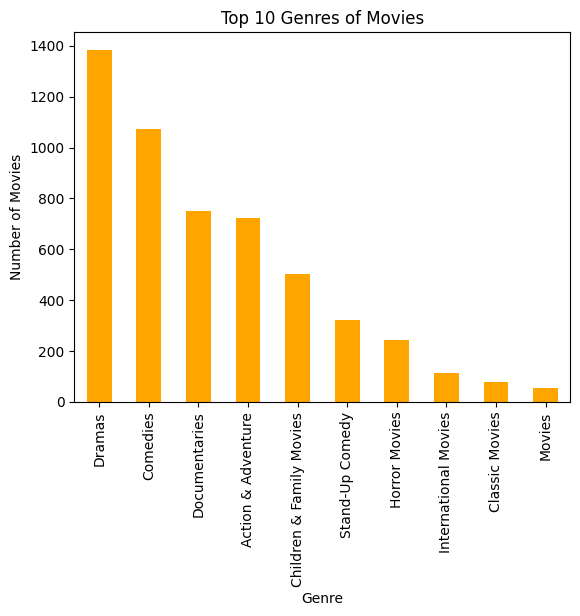

In [87]:
#Top 10 genres of movies
data[(data['type']=='Movie')].genre.value_counts().nlargest(10).plot(kind='bar', x='genre', color='orange')
plt.title('Top 10 Genres of Movies')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')

Text(0.5, 0, 'Genre')

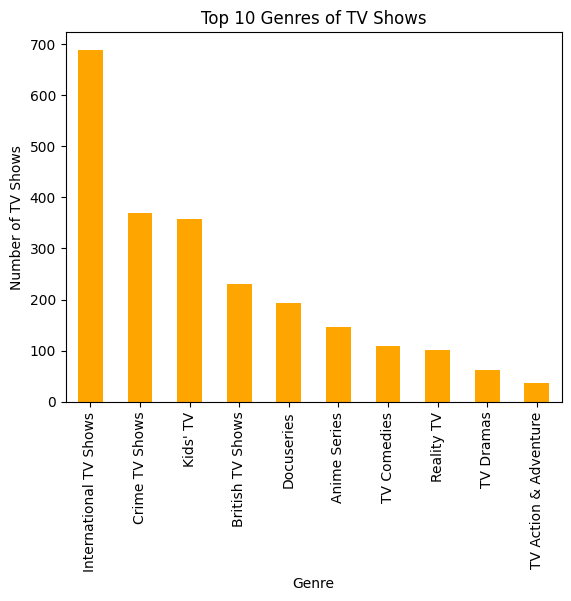

In [88]:
data[(data['type']=='TV Show')].genre.value_counts().nlargest(10).plot(kind='bar', x='genre', color='orange')
plt.title('Top 10 Genres of TV Shows')
plt.ylabel('Number of TV Shows')
plt.xlabel('Genre')

Text(0.5, 0, 'Director')

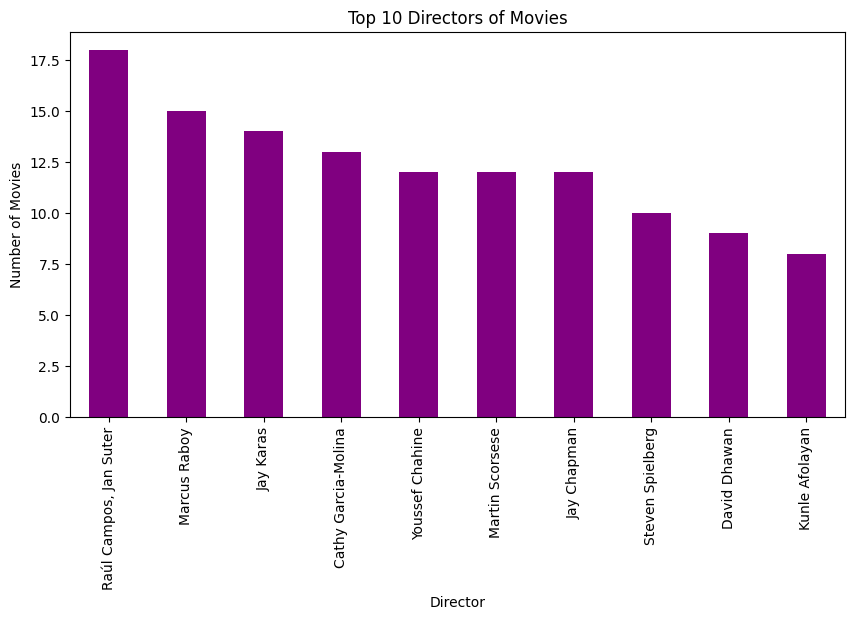

In [100]:
#Top 10 directors of movies
plt.figure(figsize=(10,5))
data[~(data['director']== 'Unknown') & (data['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='bar',  color='purple')
plt.title('Top 10 Directors of Movies')
plt.ylabel('Number of Movies')
plt.xlabel('Director')

Text(0.5, 0, 'Director')

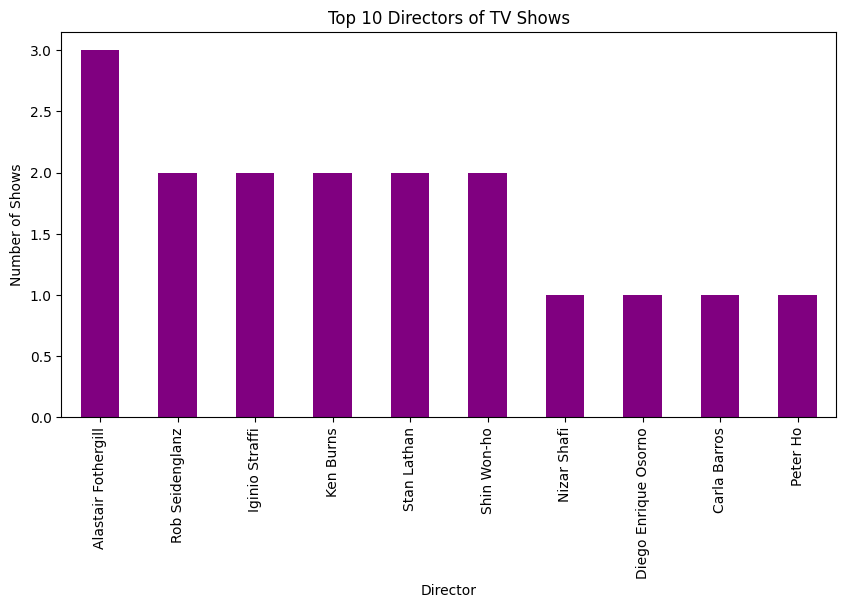

In [101]:
plt.figure(figsize=(10,5))
data[~(data['director']== 'Unknown') & (data['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='bar',  color='purple')
plt.title('Top 10 Directors of TV Shows')
plt.ylabel('Number of Shows')
plt.xlabel('Director')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   int64 
 10  description   7777 non-null   object
 11  genre         7777 non-null   object
 12  month_added   7777 non-null   object
 13  year_added    7777 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 911.4+ KB


Text(0.5, 0, 'Actor')

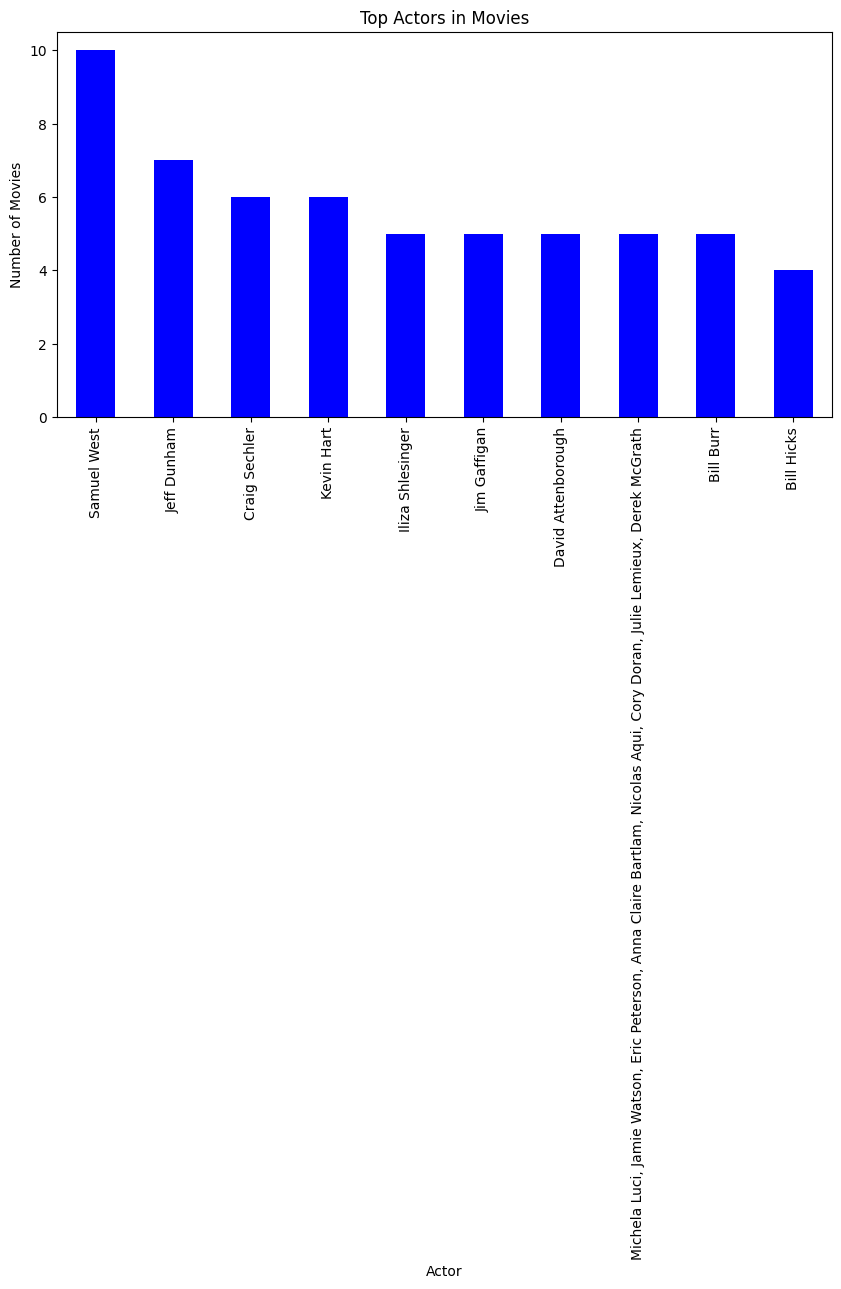

In [104]:
#Top actors of movies
plt.figure(figsize=(10,5))
data[~(data['cast']=='Unknown') & (data['type'] == 'Movie')].cast.value_counts().head(10).plot(kind='bar', color='blue')
plt.title('Top Actors in Movies')
plt.ylabel('Number of Movies')
plt.xlabel('Actor')

Text(0.5, 0, 'Actor')

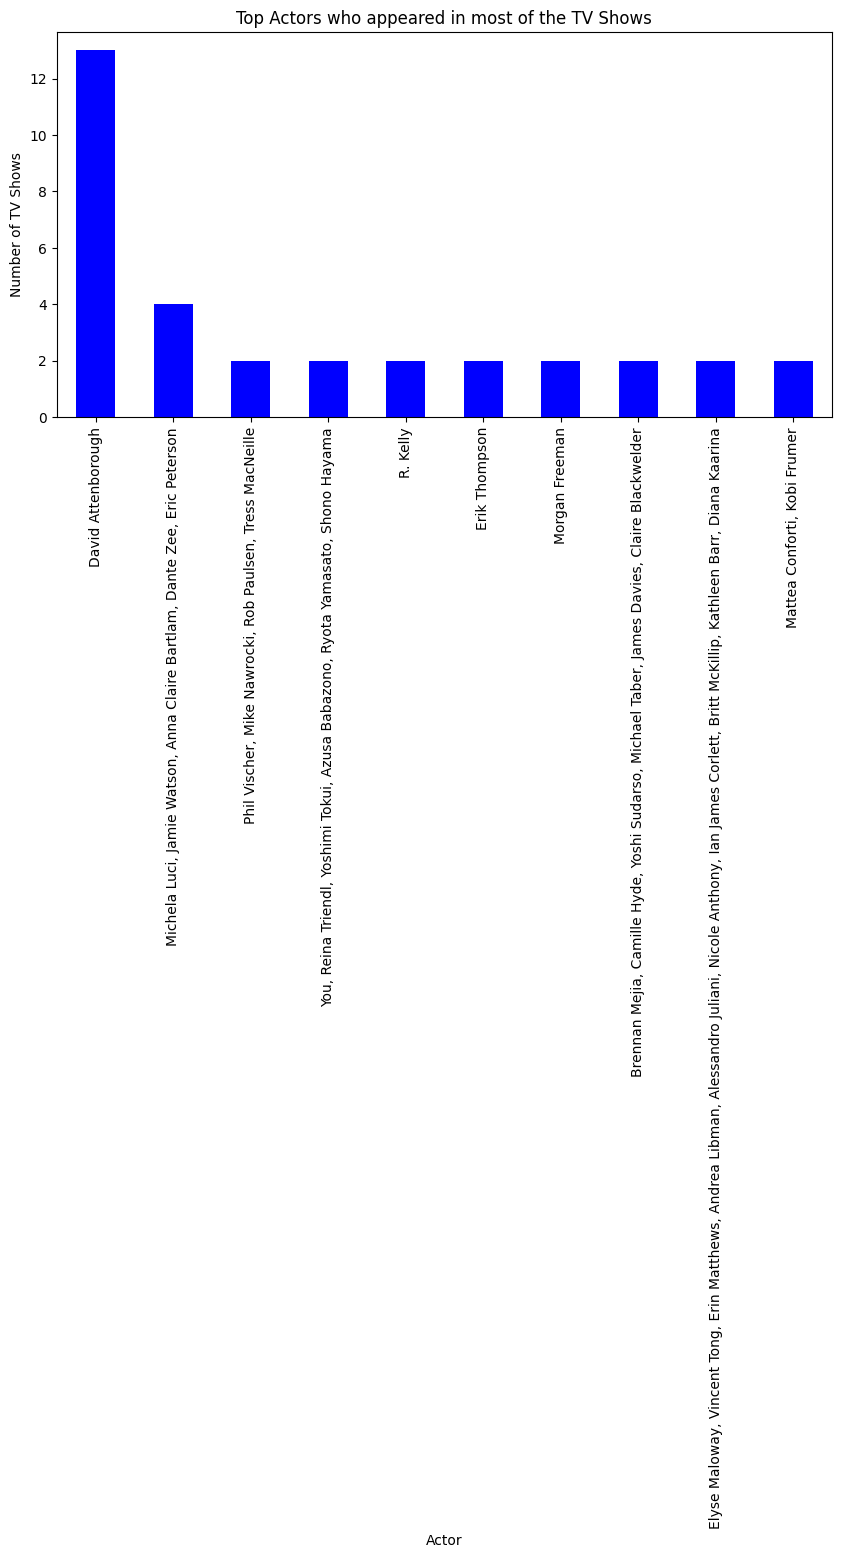

In [109]:
#Top actors of tv shows
plt.figure(figsize=(10,5))
data[~(data['cast']=='Unknown') & (data['type'] == 'TV Show')].cast.value_counts().head(10).plot(kind='bar', color='blue')
plt.title('Top Actors who appeared in most of the TV Shows')
plt.ylabel('Number of TV Shows')
plt.xlabel('Actor')

In [114]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import re, string,unicodedata
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

In [115]:
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [132]:
data.description.values

array(['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
       'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
       "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
       ...,
       "In this documentary, South African rapper Nasty C hits the stage and streets of Tokyo, introducing himself to the city's sights, sounds and culture.",
       'Dessert wizard Adriano Zumbo looks for the next “Willy Wonka” in this tense competition that finds skilled amateurs competing for a $100,000 prize.',
       'This documentary delves into the mystique behind the blues-rock trio and explores how the enigmatic band created their iconic look and sound.'],
      shape=(7777,), dtype=object)

WordCloud -- Its a cloud of texts in the dataset that highlights the keywords. More the frequency of a word is more bold it appears in the cloud

In [138]:
#Word Cloud for movie descriptions

comments = ''

for val in data.description.values:
    val = str(val)
    val = re.sub(r'[^\w\s]', '', val)   #removing any spcl character other than white space characters
    val = val.lower()       
    tokens = val.split()    #tokenizing the text
    comments += ' '.join(tokens)+" "  #joining the tokens to form a string
    
    
wordcloud = WordCloud(width=700, height = 700, background_color='pink',stopwords=set(STOPWORDS), min_font_size=10).generate(comments)

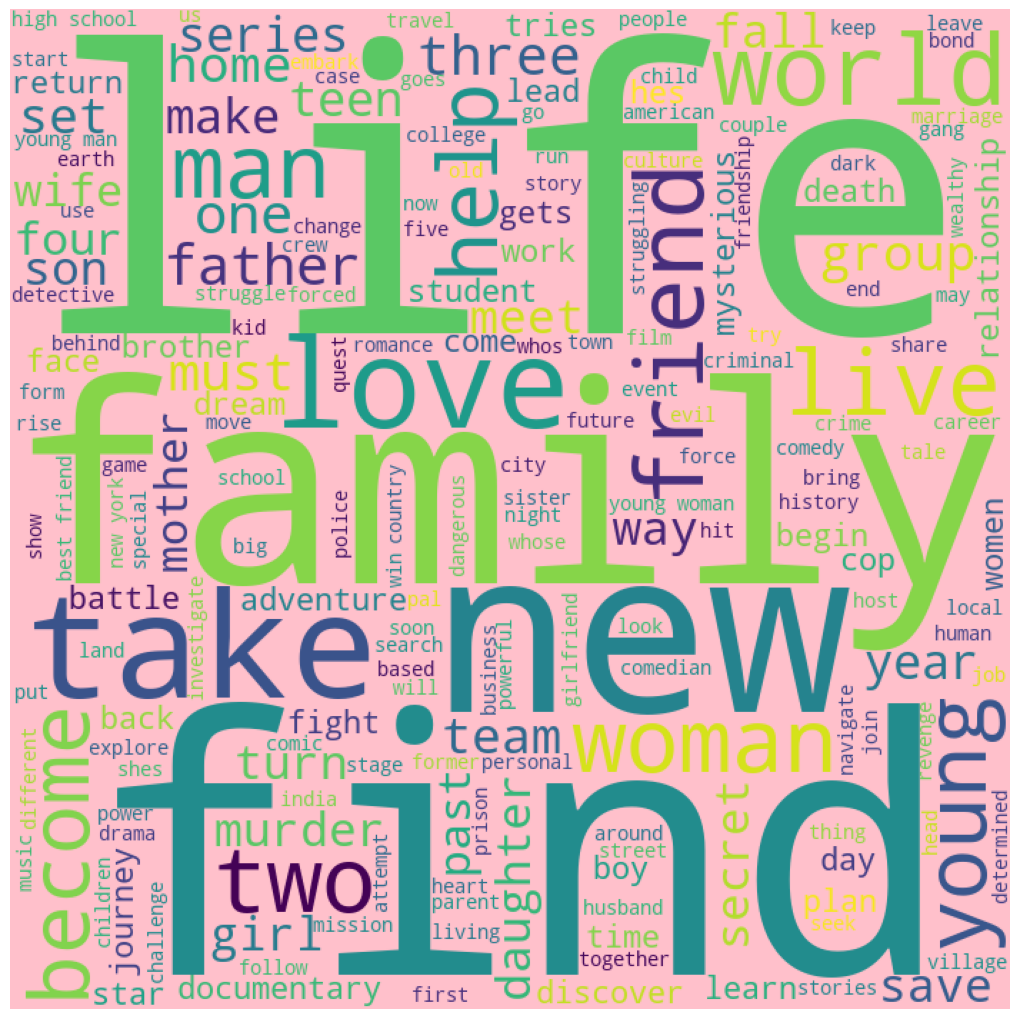

In [139]:
#visualizing the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)